In [1]:
from pathlib import Path
from trajdata.visualization import plot_scene_batch, plot_agent_batch_interactive
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
from collections import defaultdict
from trajdata import UnifiedDataset, SceneBatch, AgentBatch

waymo_path = Path(r"K:\Master\Waymo")
cache_path = Path(r"K:\Master\.trajdata_cache")

dataset = UnifiedDataset(
    desired_data=["waymo_custom"],
    data_dirs={  # Remember to change this to match your filesystem!
        "waymo_custom": waymo_path,
    },
    verbose=True,
    only_predict=None,
    state_format="x,y,z,xd,yd,h",
    obs_format="x,y,z,xd,yd,s,c,h",
    standardize_data=False,
    incl_robot_future=False,
    incl_raster_map=False,
    raster_map_params={
        "px_per_m": 2,
        "map_size_px": 224,
        "offset_frac_xy": (-0.5, 0.0),
        "num_workers": 0,
    },
    # only_types=[AgentType.VEHICLE],
    agent_interaction_distances=defaultdict(lambda: 30.0),
    # max_agent_num=20,
    cache_location=cache_path,
    num_workers=0,
    incl_vector_map=True,
    vector_map_params={
        "incl_road_lanes": True,
        "incl_road_areas": True,
        "incl_ped_crosswalks": True,
        "incl_ped_walkways": True,
        "collate": True,
        "keep_in_memory": False,
    },
    centric="agent",  # All agents at one time step,
)

Loading data for matched scene tags: ['custom-waymo_custom']


C:\Users\nicoj\PycharmProjects\trajdata\src\trajdata\dataset.py:414: UserWarning: 

############ WARNING! ############
Waymo has many gaps in the associations between lane centerlines and boundaries,
making it difficult to construct lane edge polylines or road area polygons.
The ones currently provided by trajdata should be considered low quality!
#################################

  warnings.warn(
Calculating Agent Data (Serially): 100%|██████████| 496/496 [00:00<00:00, 5590.57it/s]


496 scenes in the scene index.


Structuring Agent Data Index: 100%|██████████| 496/496 [00:00<00:00, 15371.70it/s]


In [3]:

dataloader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    collate_fn=dataset.get_collate_fn(),
    num_workers=0,
)

  0%|          | 0/1643470 [00:00<?, ?it/s]

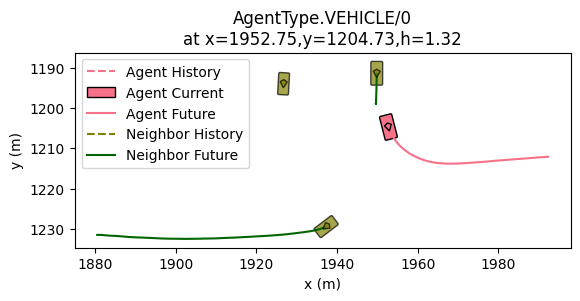

INFO:bokeh.server.server:Starting Bokeh server version 3.4.3 (running on Tornado 6.4.2)
INFO:bokeh.server.tornado:Check for unused sessions every 500 milliseconds
INFO:bokeh.server.tornado:Unused sessions last for 500 milliseconds
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)
  0%|          | 1/1643470 [00:00<198:54:55,  2.30it/s]


RuntimeError: Cannot run the event loop while another loop is running

In [13]:
torch.manual_seed(42)
from trajdata import AgentBatch, AgentType, UnifiedDataset
from trajdata.visualization.interactive_animation import (
    InteractiveAnimation,
    animate_agent_batch_interactive,
)
i = 0


for batch in tqdm(dataloader):

    if i==1:
        plot_agent_batch_interactive(batch, batch_idx=0, cache_path=dataset.cache_path)
        plot_agent_batch(batch, batch_idx=0)

        animation = InteractiveAnimation(
            animate_agent_batch_interactive,
            batch=batch,
            batch_idx=0,
            cache_path=dataset.cache_path,
        )
        animation.show()
        # break
        

    i += 1
    if i == 100:
        break